In [1]:
import openpyxl
from PIL import Image
from io import BytesIO
import os

## エクセルファイル上の画像とセル番地を取得する
エクセルファイルを読み込み、シートを取得します。  
サンプルデータでは１シートのみですが、お手元のファイルに応じて処理してください。

In [2]:
path = 'irasutoya_athletics.xlsx'
reader = openpyxl.load_workbook(path)   # workbook の読み込み
ws = reader.worksheets[0]               # worksheet の取得（サンプルデータは1シートのみ）

ワークシートに含まれる画像リストを取り出してみます。  
先頭にアンダースコアがついているので、表向きには紹介されないインスタンス変数です。

In [15]:
ws._images

各画像が配置されているセルの情報は、Image.anchor からアクセスできます。  
複数セルにまたがっている画像を扱う場合は、これらの情報からうまく扱ってください。
* .anchor._from : 画像の左上
* .anchor.to : 画像の右下

In [16]:
img = ws._images[0]
img.anchor._from

<openpyxl.drawing.spreadsheet_drawing.AnchorMarker object>
Parameters:
col=1, colOff=0, row=2, rowOff=1

さらに、行番号および列番号も取得できます。

In [17]:
img.anchor._from.row, img.anchor._from.col

(2, 1)

参考ですが、エクセルファイルの拡張子を .zip に変更して解凍すると、画像ファイルが image1.png のように連番で保存されています。  
このパスも一見すると取り出せそうなのですが...

In [18]:
img.path

'/xl/media/image1.png'

全ての画像で image1.png となってしまいます。    
これは、Image クラスのクラス変数 _id = 1 とハードコーディングされているためです。  
openpyxl のアップデートを待つことになりそうです。

In [19]:
[img.path for img in ws._images]

['/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png',
 '/xl/media/image1.png']

次に、画像データを取り出してみます。  
Image._data() でデータを取得できますが、バイナリ形式です。  
一度 BytesIO を経由してから PIL で開きます。

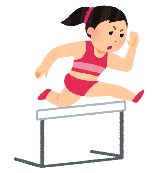

In [20]:
img = ws._images[0]
binary_image = img._data()
image = Image.open(BytesIO(binary_image))
image

これまでの流れから、画像と配置されているセル番地を取得できるようになりました。  
あとは、表の列見出しなどから情報を取得し、画像を保存してみます。  
今回のサンプルファイルは、B1:C1 が列見出し、A2:A8 が行見出しです。

In [21]:
ws.cell(row=1, column=2).value

'女性'

In [5]:
output_dir = './images'
os.makedirs(output_dir, exist_ok=True)  # 出力フォルダの作成
for img in ws._images:
    # セル番地
    row, col = (img.anchor._from.row + 1, img.anchor._from.col + 1)
    # 画像データ
    binary_image = img._data()
    image = Image.open(BytesIO(binary_image))
    # 見出し情報
    gender = ws.cell(row=1, column=col).value
    event = ws.cell(row=row, column=1).value
    # 保存
    output_path = os.path.join(output_dir, f'{gender}-{event}.png')
    image.save(output_path)

ValueError: I/O operation on closed file.